In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

data = pd.read_csv(path)
#data.head()
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## Analyzing Individual Feature Patterns using Visualization

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [3]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [7]:
#the correlation between variables of type "int64" or "float64" 

data[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


Continuous numerical variables

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.


In [ ]:
Positive linear relationship

(0, 56175.033884712975)

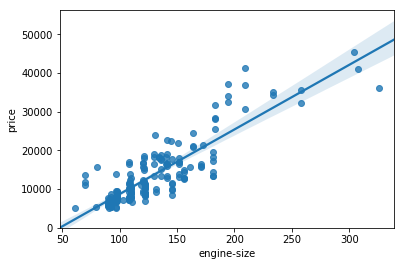

In [15]:
# Engine size as potential predictor variable of price

sns.regplot(x="engine-size", y="price", data=data)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [16]:
data[['engine-size', 'price']].corr()

# 0.872335 correlation

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


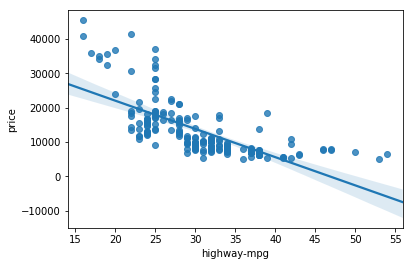

In [17]:
sns.regplot(x="highway-mpg", y="price", data=data)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [21]:
data[['highway-mpg', 'price']].corr()

# -0.704692 correlation

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Weak Linear Relationship

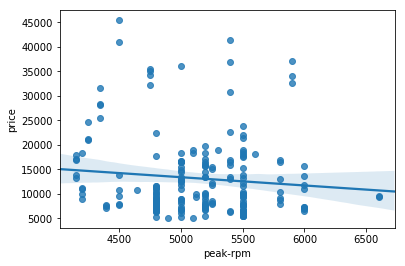

In [23]:
sns.regplot(x="peak-rpm", y="price", data=data)

eak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variabl

In [25]:
data[["peak-rpm", "price"]].corr()

# -0.101616 correlation

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

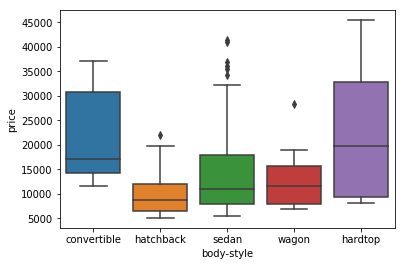

In [27]:
sns.boxplot(x="body-style", y="price", data=data)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

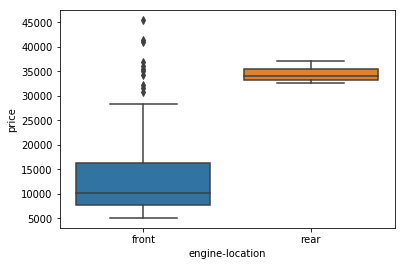

In [29]:
sns.boxplot(x="engine-location", y="price", data=data)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

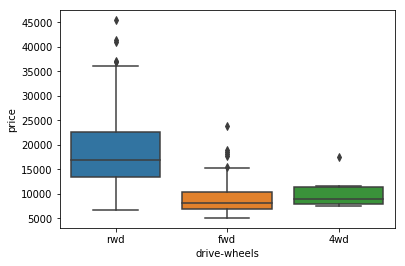

In [32]:
sns.boxplot(x="drive-wheels", y="price", data=data)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

## Descriptive Statistical Analysis

In [36]:
data.describe(include=['int64'])

,symboling,normalized-losses,curb-weight,engine-size,city-mpg,highway-mpg,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,2555.666667,126.875622,25.179104,30.686567,0.099502,0.900498
std,1.254802,31.99625,517.296727,41.546834,6.423220,6.815150,0.300083,0.300083
min,-2.000000,65.00000,1488.000000,61.000000,13.000000,16.000000,0.000000,0.000000
25%,0.000000,101.00000,2169.000000,98.000000,19.000000,25.000000,0.000000,1.000000
50%,1.000000,122.00000,2414.000000,120.000000,24.000000,30.000000,0.000000,1.000000
75%,2.000000,137.00000,2926.000000,141.000000,30.000000,34.000000,0.000000,1.000000
max,3.000000,256.00000,4066.000000,326.000000,49.000000,54.000000,1.000000,1.000000


In [37]:
# method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

data['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [39]:
data['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [56]:
drive_wheels_counts = data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'values_counts'}, inplace=True)

drive_wheels_counts

,values_counts
fwd,118
rwd,75
4wd,8


In [45]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,values_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [53]:
engine_loc_counts = data['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value-counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'

engine_loc_counts

,value-counts
engine-location,
front,198
rear,3


## Basic of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

In [57]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [66]:
group = data[['drive-wheels', 'price']]

data_group = group.groupby(['drive-wheels'], as_index=False).mean()

data_group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [74]:
group2 = data[['drive-wheels', 'body-style', 'price']]
datag_group2 = group2.groupby(['drive-wheels', 'body-style'], as_index=False).mean().round(2)

datag_group2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.00
1,4wd,sedan,12647.33
2,4wd,wagon,9095.75
3,fwd,convertible,11595.00
4,fwd,hardtop,8249.00
5,fwd,hatchback,8396.39
6,fwd,sedan,9811.80
7,fwd,wagon,9997.33
8,rwd,convertible,23949.60
9,rwd,hardtop,24202.71


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In [76]:
grouped_pivot = datag_group2.pivot(index='drive-wheels', columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  0.0      0.00   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

A heat map to visualize the relationship between Body Style vs Price.

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

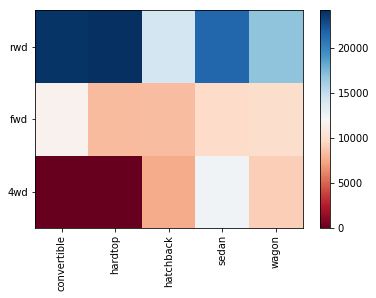

In [87]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".

## Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.

In [89]:
data.corr().head(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546


P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
the p-value is  <  0.1: there is weak evidence that the correlation is significant.
the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [93]:
pearson_coef, p_value = stats.pearsonr(data['wheel-base'], data['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


Conclusion:

Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

## ANOVA

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact  'price', we group the data.

In [104]:
gp = datag_group2[['drive-wheels', 'price']].groupby(['drive-wheels'])

gp.get_group('4wd')['price'].to_frame()

,price
0,7603.00
1,12647.33
2,9095.75


In [105]:
f_val, p_val = stats.f_oneway(gp.get_group('fwd')['price'], gp.get_group('rwd')['price'], gp.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 17.54496748274914 , P = 0.0005365398153228508


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [107]:
f_val, p_val = stats.f_oneway(gp.get_group('fwd')['price'], gp.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 26.754752054692418 , P = 0.0008505284940324547


In [108]:
f_val, p_val = stats.f_oneway(gp.get_group('4wd')['price'], gp.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 13.604004341076422 , P = 0.010228613037114361


In [109]:
f_val, p_val = stats.f_oneway(gp.get_group('4wd')['price'], gp.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.015958394773170684 , P = 0.9036003702529027


We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore
Categorical variables:

Drive-wheels